<a href="https://colab.research.google.com/github/winduptu/colab_notebook/blob/main/SpaceShip_Titanic_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import gdown
#data cleansing
import pandas as pd
import numpy as np
import datetime as dt # library ที่ใช้ในการจัดการวันที่

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning library
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [99]:
#ohe function
def ohe_function(df, columns):
  ohe = OneHotEncoder()
  ohe.fit_transform(df[[columns]]).toarray()
  matrix = ohe.fit_transform(df[[columns]]).toarray()
  column_names = ohe.get_feature_names_out()  
  for i in range(len(matrix.T)):
            df[column_names[i]]= matrix.T[i]
  df = df.drop(columns=[columns])
  
#label encoder function
def le_function(df,columns):
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  df[columns] = le.fit_transform(df[columns])

In [100]:
train_file = 'https://drive.google.com/uc?id=1izcF1oBxz5YRfoVuYl3X1wvsadOwyG_0'
test_file = 'https://drive.google.com/uc?id=1z45ulydldlPWoZPreyYSeiaZnuYfqEhC'
df = pd.read_csv(train_file)
test = pd.read_csv(test_file)

In [101]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [102]:
df = df.drop('Name', axis=1)

In [103]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [104]:
df.isnull().mean()

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Transported     0.000000
dtype: float64

In [105]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [106]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [107]:
cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' ,'VRDeck']

for i in cols:
  df[i].fillna(df[i].mean(), inplace=True)
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [108]:
df.dropna(inplace=True)

In [109]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


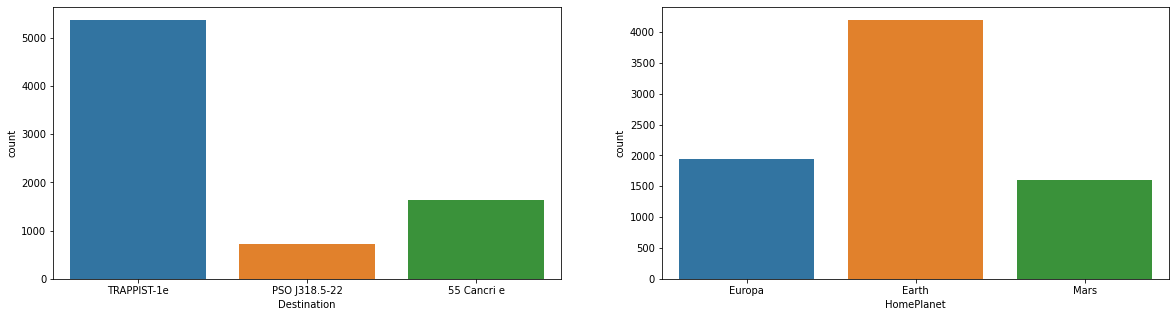

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(df['Destination'],ax=ax[0],)
sns.countplot(df['HomePlanet'],ax=ax[1])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

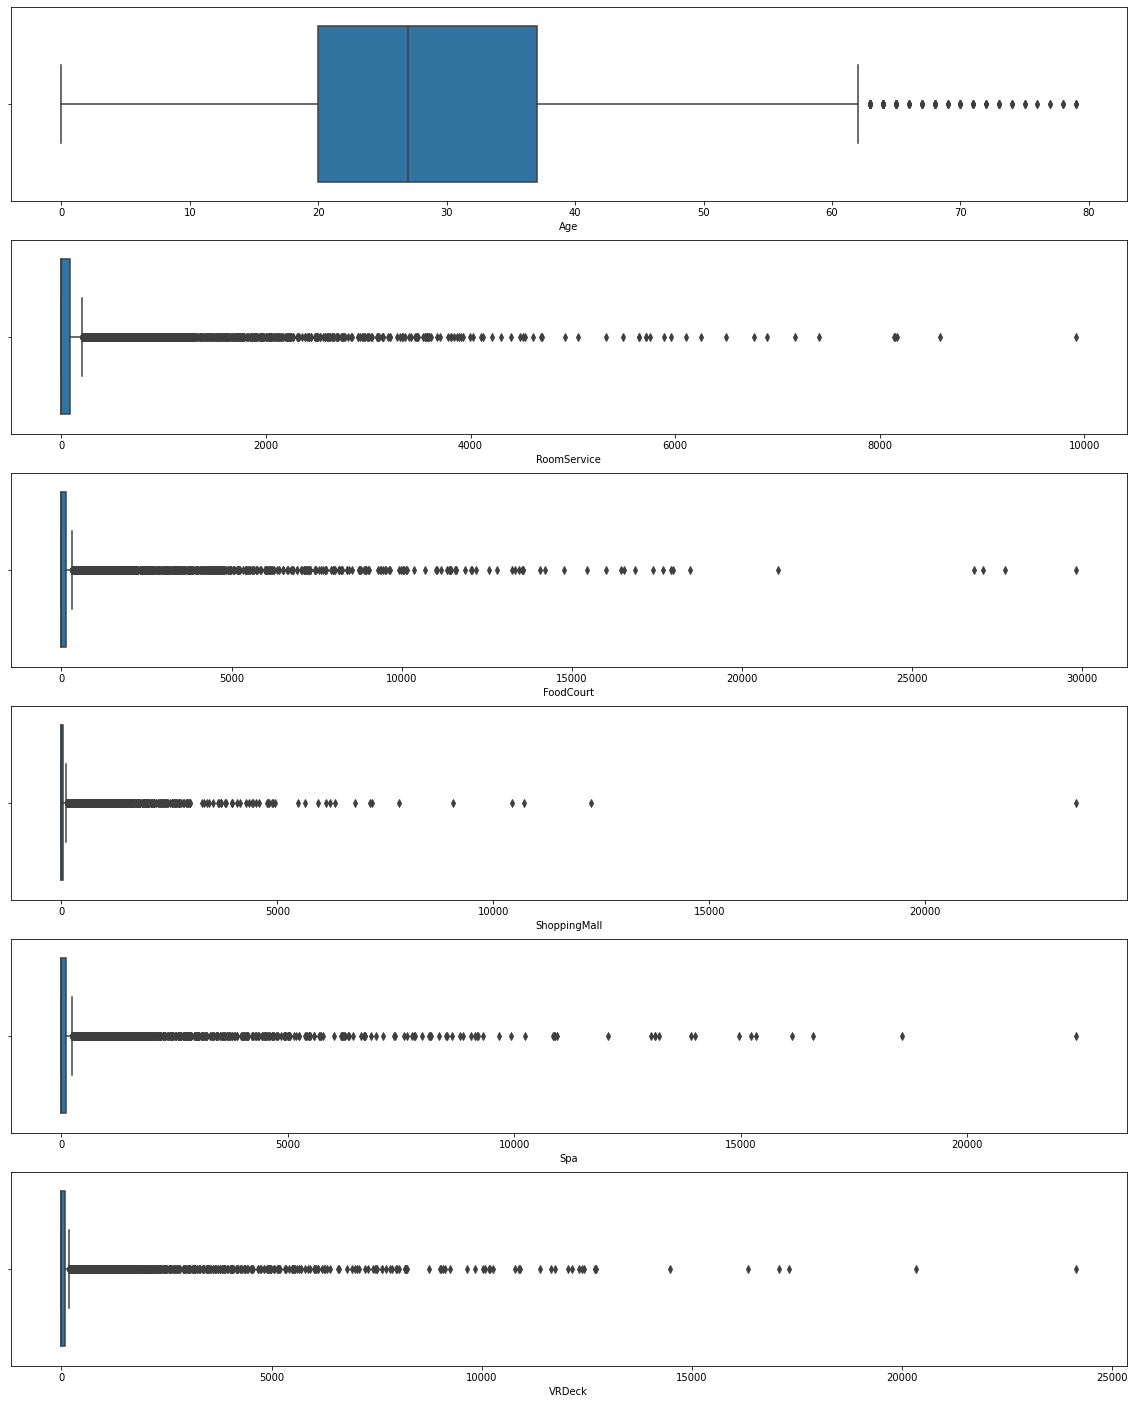

In [111]:
fig, ax = plt.subplots(6, 1, figsize=(20, 25))
sns.boxplot(df['Age'],ax=ax[0])
sns.boxplot(df['RoomService'],ax=ax[1])
sns.boxplot(df['FoodCourt'],ax=ax[2])
sns.boxplot(df['ShoppingMall'],ax=ax[3])
sns.boxplot(df['Spa'],ax=ax[4])
sns.boxplot(df['VRDeck'],ax=ax[5])
plt.show()

In [112]:
#ปรับค่า outlier ด้วย STD
for i in cols:
  factor = 3
  upper_lim = df[i].mean() + df[i].std() * factor
  lower_lim = df[i].mean() - df[i].std() * factor

  drop_outlier1 = df[(df[i] < upper_lim) & (df[i] > lower_lim)]

drop_outlier1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

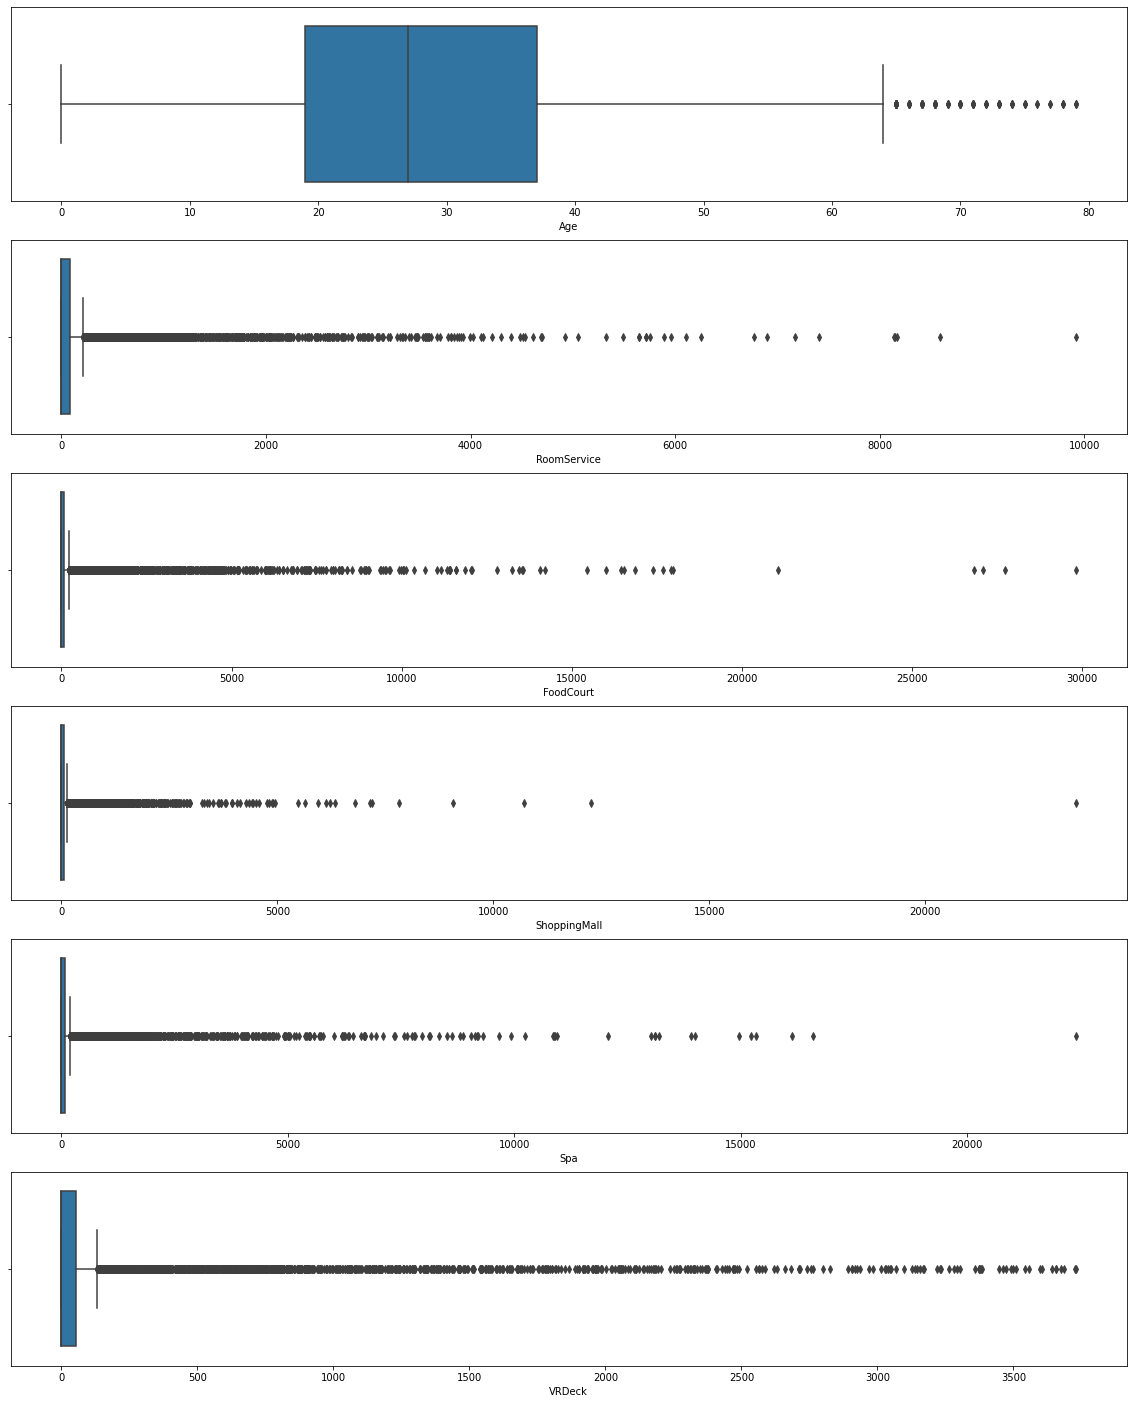

In [113]:
fig, ax = plt.subplots(6, 1, figsize=(20, 25))
sns.boxplot(drop_outlier1['Age'],ax=ax[0])
sns.boxplot(drop_outlier1['RoomService'],ax=ax[1])
sns.boxplot(drop_outlier1['FoodCourt'],ax=ax[2])
sns.boxplot(drop_outlier1['ShoppingMall'],ax=ax[3])
sns.boxplot(drop_outlier1['Spa'],ax=ax[4])
sns.boxplot(drop_outlier1['VRDeck'],ax=ax[5])
plt.show()

In [114]:
#ปรับค่า outlier ด้วย percentile

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

drop_outlier2 = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
drop_outlier2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

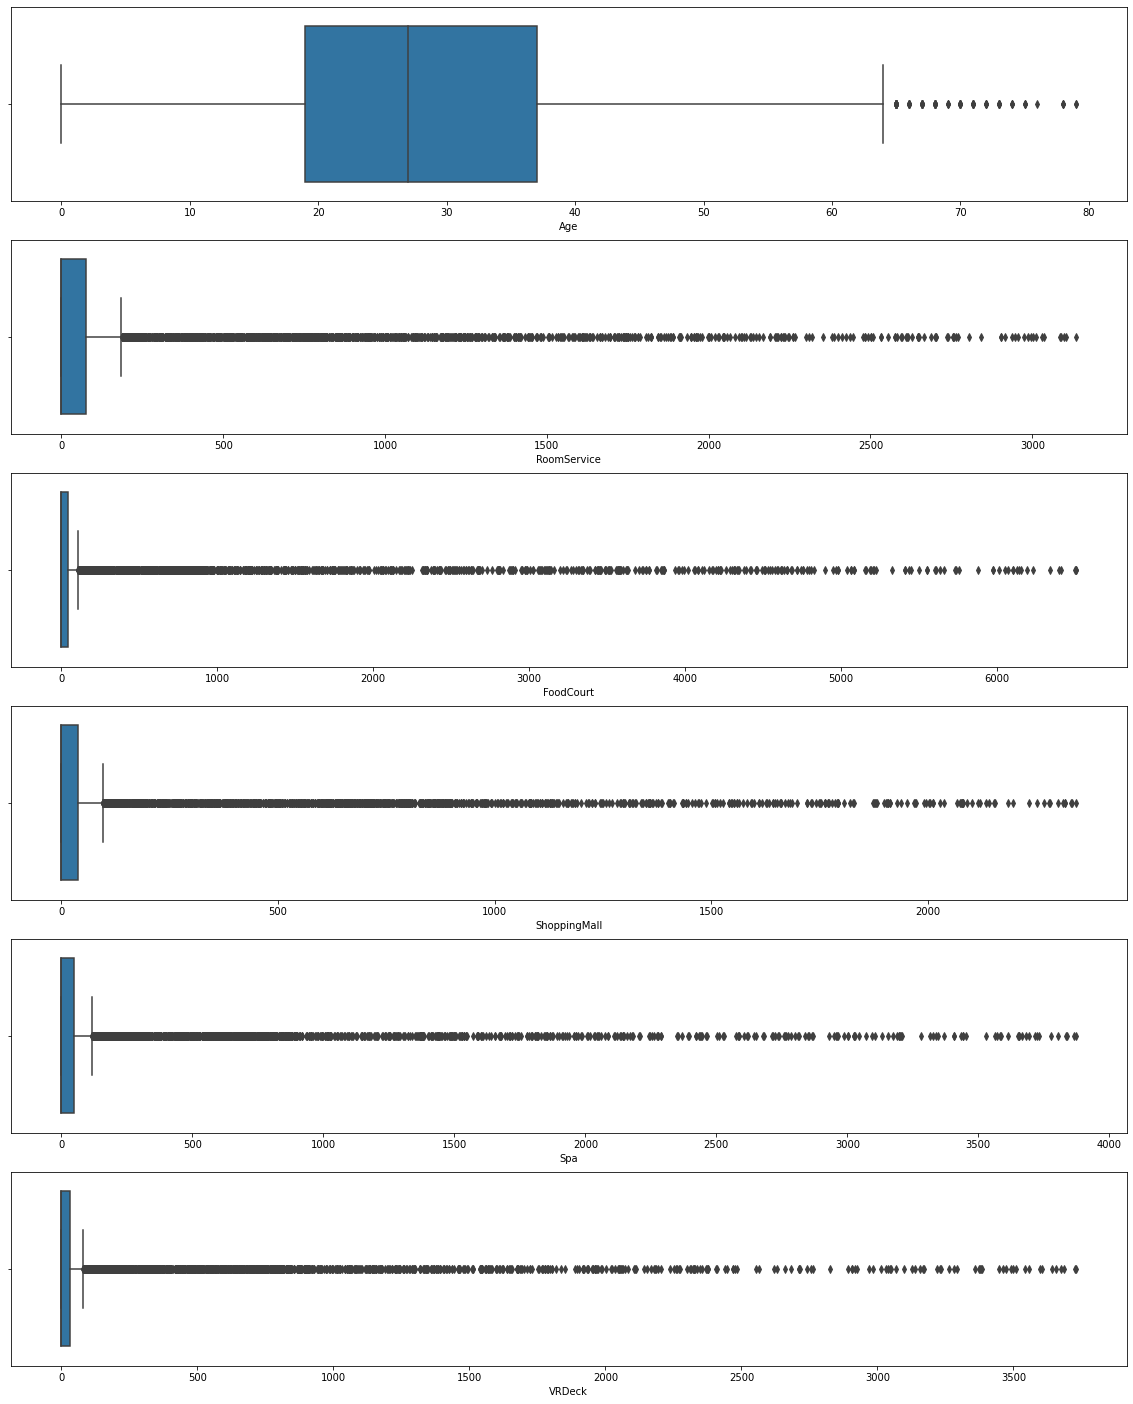

In [115]:
fig, ax = plt.subplots(6, 1, figsize=(20, 25))
sns.boxplot(drop_outlier2['Age'],ax=ax[0])
sns.boxplot(drop_outlier2['RoomService'],ax=ax[1])
sns.boxplot(drop_outlier2['FoodCourt'],ax=ax[2])
sns.boxplot(drop_outlier2['ShoppingMall'],ax=ax[3])
sns.boxplot(drop_outlier2['Spa'],ax=ax[4])
sns.boxplot(drop_outlier2['VRDeck'],ax=ax[5])
plt.show()

**EXTRACT_FEATURES**

In [116]:
drop_outlier2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [117]:
drop_outlier2.set_index('PassengerId', inplace=True)

In [118]:
drop_outlier2['Deck'], drop_outlier2['Num'], drop_outlier2['Side']  = drop_outlier2['Cabin'].str.split('/').str
drop_outlier2 = drop_outlier2.drop(columns=['Cabin'])

<ipython-input-118-a2cfe43bef70>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  drop_outlier2['Deck'], drop_outlier2['Num'], drop_outlier2['Side']  = drop_outlier2['Cabin'].str.split('/').str
<ipython-input-118-a2cfe43bef70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_outlier2['Deck'], drop_outlier2['Num'], drop_outlier2['Side']  = drop_outlier2['Cabin'].str.split('/').str


In [119]:
drop_outlier2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
0005_01,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True,F,0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275_02,Europa,False,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,False,A,97,P
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S


In [120]:
drop_outlier2.drop('Num', axis=1, inplace=True)

In [121]:
le_cols = ['CryoSleep', 'VIP', 'Transported', 'HomePlanet', 'Destination', 'Deck', 'Side']
for i in le_cols:
  le_function(drop_outlier2, i)

drop_outlier2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
PassengerId,,,,,,,,,,,,,
0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,1
0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1
0005_01,0,0,1,44.0,0,0.0,483.0,0.0,291.0,0.0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275_02,1,0,2,32.0,0,1.0,1146.0,0.0,50.0,34.0,0,0,0
9278_01,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6,1
9279_01,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6,1


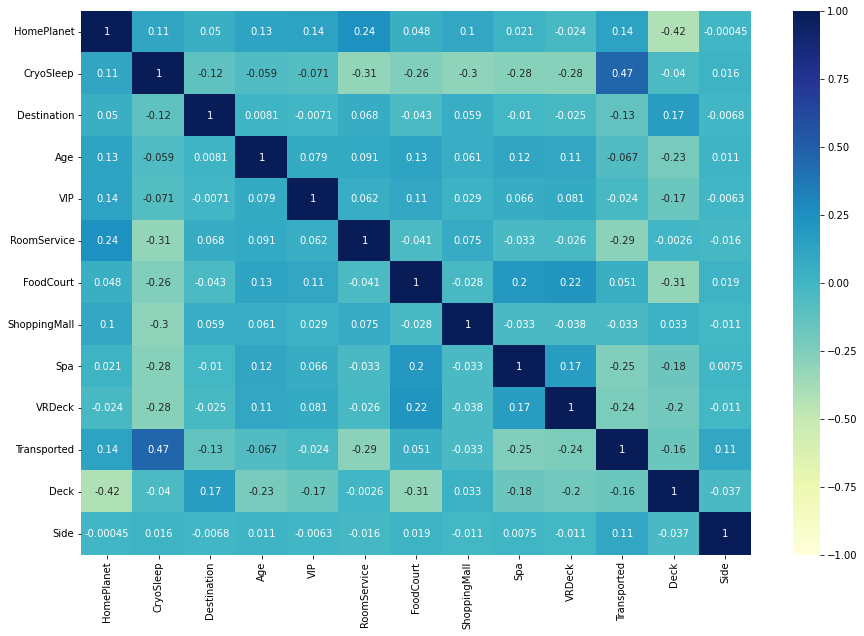

In [122]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(drop_outlier2.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

In [133]:
X = drop_outlier2.drop(columns=['Transported'])
y = drop_outlier2['Transported']

from pandas.core.common import random_state
# เลือก Model ที่จะใช้ทำการทดลอง
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# เลือกวิธีการวัดผล
from sklearn.metrics import accuracy_score,f1_score
# เรียก Library แบ่งข้อมูล
from sklearn.model_selection import train_test_split

# data_clean = data.dropna() # Drop row ที่เป็น Na ออก
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state=0)
models = {}
result = {}
models["random forest"] = RandomForestClassifier(random_state=0)
models["tree"] = DecisionTreeClassifier(random_state=0)
models["svc"] = LinearSVC(random_state=0)
models["logistic regression"] = LogisticRegression(random_state=0)
models["K nearest neighbor"] = KNeighborsClassifier(n_neighbors=3)

for name,model in models.items():
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  result[name] = accuracy_score(y_test,pred)
  print(f"The accuracy of {name} is {accuracy_score(y_test,pred)}")
  print(f"The f1-score of {name} is {f1_score(y_test,pred)}")

The accuracy of random forest is 0.7840699815837937
The f1-score of random forest is 0.7923860115095175
The accuracy of tree is 0.7338858195211786
The f1-score of tree is 0.7491319444444444


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of svc is 0.7348066298342542
The f1-score of svc is 0.7876106194690264
The accuracy of logistic regression is 0.7808471454880295
The f1-score of logistic regression is 0.8011695906432749
The accuracy of K nearest neighbor is 0.759208103130755
The f1-score of K nearest neighbor is 0.7746660922016372


In [125]:
test = pd.read_csv(test_file)
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

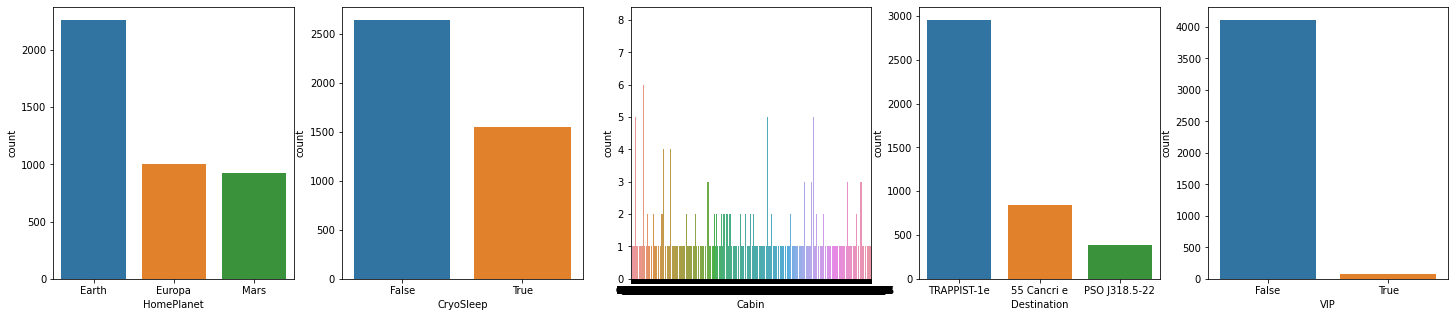

In [126]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
sns.countplot(test['HomePlanet'],ax=ax[0],)
sns.countplot(test['CryoSleep'],ax=ax[1])
sns.countplot(test['Cabin'],ax=ax[2])
sns.countplot(test['Destination'],ax=ax[3])
sns.countplot(test['VIP'],ax=ax[4])
plt.show()

In [127]:
test = pd.read_csv(test_file)
test = test.drop('Name', axis=1)
cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' ,'VRDeck']
for i in cols:
  test[i].fillna(test[i].mean(), inplace=True)

test['HomePlanet'].fillna('Earth', inplace=True)
test['CryoSleep'].fillna(False, inplace=True)
test['Cabin'].fillna('A/0/A', inplace=True)
test['Destination'].fillna('TRAPPIST-1e', inplace=True)
test['VIP'].fillna(False, inplace=True)

#Feature Extract
test['Deck'], test['Num'], test['Side']  = test['Cabin'].str.split('/').str
test.drop('Num', axis=1, inplace=True)
test = test.drop(columns=['Cabin'])
le_cols = ['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Deck', 'Side']
for i in le_cols:
  le_function(test, i)

test = test.set_index('PassengerId')
test

<ipython-input-127-ad6c977a31e9>:14: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  test['Deck'], test['Num'], test['Side']  = test['Cabin'].str.split('/').str


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
PassengerId,,,,,,,,,,,,
0013_01,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,6,2
0018_01,0,0,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,5,2
0019_01,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,2,2
0021_01,1,0,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,2,2
0023_01,0,0,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,6,2
9269_01,0,0,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,0
9271_01,2,1,0,28.658146,0,0.0,0.0,0.0,0.0,0.0,3,1


In [128]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Side            0
dtype: int64

In [136]:
test2 = pd.read_csv(test_file)
a = pd.DataFrame()
a['PassengerId'] = test2['PassengerId']
a['Transported'] = models["random forest"].predict(test).astype('bool')
a

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [137]:
a.to_csv('/content/sample_data/kaggle_space.csv', index=False)